In [1]:
# Load Dataset

import pandas as pd

data = pd.read_csv("/content/Diabetes.csv")

In [2]:
# Display First 10 Rows

data.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# Split Data Set into Train and Test

train_percent = round((data.shape[0]*80)/100)
print("Train Data :",train_percent)

test_percent = round((data.shape[0]*20)/100)
print("Test Data :",test_percent)

Train Data : 614
Test Data : 154


In [4]:
XTrain = data[:train_percent]
XTest = data[train_percent:]

print("Train Set :", XTrain.shape, "\nTest Set:", XTest.shape)

Train Set : (614, 9) 
Test Set: (154, 9)


In [5]:
# Split the dataset into 80% training and 20% testing 

from sklearn.model_selection import train_test_split  

Y = data.Outcome # Only Target Label

X = data.drop('Outcome',axis=1) # Features
# axis = Whether to drop 0 - labels from the index or 1 - columns.

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)


print(x_train.head(), "\n", y_train.head())

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
473            7      136             90  ...  29.9                     0.210   50
465            0      124             56  ...  21.8                     0.452   21
72            13      126             90  ...  43.4                     0.583   42
127            1      118             58  ...  33.3                     0.261   23
204            6      103             72  ...  37.7                     0.324   55

[5 rows x 8 columns] 
 473    0
465    0
72     1
127    0
204    0
Name: Outcome, dtype: int64


In [6]:
from sklearn.preprocessing import StandardScaler

st_scaler=StandardScaler()

x_train=st_scaler.fit_transform(x_train)

x_test=st_scaler.transform(x_test)

* We have to execute, ```scaler=StandardScaler().fit(X_Test)```

In [7]:
from sklearn.neighbors import KNeighborsClassifier  

classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

print(y_pred)

[1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1
 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1
 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 1]


In [27]:
from sklearn.metrics import classification_report, confusion_matrix  
 
print(confusion_matrix(y_test, y_pred))  
print()

print(accuracy_score(y_test, y_pred))
print()

print(classification_report(y_test, y_pred))  

[[87 12]
 [30 25]]

0.7272727272727273

              precision    recall  f1-score   support

           0       0.74      0.88      0.81        99
           1       0.68      0.45      0.54        55

    accuracy                           0.73       154
   macro avg       0.71      0.67      0.67       154
weighted avg       0.72      0.73      0.71       154



Above confusion matrix shows that there are,

* 87 True Negative cases
* 25 True Positive cases
* 12 False Positive cases
* 30 False Negative cases

In [30]:
import numpy as np

print('Actual Outcome 0 :',np.sum(y_test==0))
print('Predicted Outcome 0 :',np.sum(y_pred==0))
print()

print('Actual Outcome 1 :',np.sum(y_test==1))
print('Predicted Outcome 1 :',np.sum(y_pred==1))

Actual Outcome 0 : 99
Predicted Outcome 0 : 117

Actual Outcome 1 : 55
Predicted Outcome 1 : 37


```
Total number of correct prediction is 87 + 25 = 112
```

Now K = 2

[[90  9]
 [32 23]]

              precision    recall  f1-score   support

           0       0.74      0.91      0.81        99
           1       0.72      0.42      0.53        55

    accuracy                           0.73       154
   macro avg       0.73      0.66      0.67       154
weighted avg       0.73      0.73      0.71       154


Now K = 5

[[84 15]
 [22 33]]

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.69      0.60      0.64        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154


Now K = 8

[[88 11]
 [27 28]]

              precision    recall  f1-score   support

           0       0.77      0.89      0.82        99
           1       0.72      0.51      0.60        55

    accuracy                           0.75       154
   macro avg       0.74      0.70

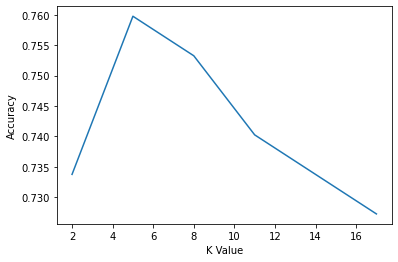

In [28]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

k = []
accuracy = []
for i in range(2,20,3):
    
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    
    print('Now K =',i)
    print()
    print(confusion_matrix(y_test, y_pred))
    print()
    
    accuracy.append(accuracy_score(y_test, y_pred))
    
    print(classification_report(y_test, y_pred)) 
    print()

    k.append(i)

plt.plot(k,accuracy)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

# KNN with Diabetes Dataset

In [31]:
df = pd.read_csv('/content/Diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
from sklearn.model_selection import train_test_split
  
arr = df.values

X = arr[:,0:8]
Y = arr[:,8]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state=1)  

print(x_test)

[[7.00e+00 1.36e+02 7.40e+01 ... 2.60e+01 6.47e-01 5.10e+01]
 [1.00e+00 1.51e+02 6.00e+01 ... 2.61e+01 1.79e-01 2.20e+01]
 [6.00e+00 1.09e+02 6.00e+01 ... 2.50e+01 2.06e-01 2.70e+01]
 ...
 [8.00e+00 1.88e+02 7.80e+01 ... 4.79e+01 1.37e-01 4.30e+01]
 [5.00e+00 1.36e+02 8.20e+01 ... 0.00e+00 6.40e-01 6.90e+01]
 [4.00e+00 9.00e+01 0.00e+00 ... 2.80e+01 6.10e-01 3.10e+01]]


In [35]:
Dist = []
row_id = 0
index = 0

euclidean = pd.DataFrame(columns=['Row ID of X Train', 'Row ID of X Test','Distance', 'Outcome'])

for i in range(len(x_train)):
    
    d = []
    
    for j in range(len(x_test)):
        l = [i,j]

        diff = x_train[i] - x_test[j]
        dist = np.linalg.norm(diff)

        l.append(dist)
        l.append(y_train[i])

        euclidean.loc[index] = l
        index += 1
        
        d.append(dist)
    
    Dist.extend(d)

euclidean

,Row ID of X Train,Row ID of X Test,Distance,Outcome
0,0.0,0.0,28.436070,1.0
1,0.0,1.0,141.348682,1.0
2,0.0,2.0,138.930183,1.0
3,0.0,3.0,156.103828,1.0
4,0.0,4.0,62.659875,1.0
...,...,...,...,...
94551,613.0,149.0,61.204806,1.0
94552,613.0,150.0,142.338699,1.0
94553,613.0,151.0,94.890878,1.0
94554,613.0,152.0,64.717931,1.0


In [38]:
matrix = euclidean.values

sorted_matrix = matrix[matrix[:,2].argsort()]

data = pd.DataFrame(sorted_matrix,columns=['Row ID of X Train', 'Row ID of X Test','Distance','Outcome'])

data.head()

,Row ID of X Train,Row ID of X Test,Distance,Outcome
0,67.0,18.0,3.586227,0.0
1,440.0,29.0,3.834006,1.0
2,359.0,100.0,4.240072,0.0
3,281.0,61.0,4.244632,0.0
4,137.0,137.0,4.275231,1.0


In [40]:
y_pred = []

for i in range(X_test.shape[0]):

    out = data.loc[data['Row ID of X Test']==i].iloc[:5,:]['Outcome'].sum()
    
    if out > 2:
        y_pred.append(1)
    
    else:
        y_pred.append(0)

accuracy_score(y_test,y_pred)

0.7337662337662337